In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib  inline

In [3]:
states_df = pd.read_excel("male monthly deaths by age group in states.xlsx",index_col= 0)
states_df.head()

,Year,States,Age-Group,Januar,Februar,März,April,Mai,Juni,Juli,August,September,Oktober,November,Dezember,machala
Nr.,,,,,,,,,,,,,,,,
1,2022,Schleswig-Holstein,Insgesamt,1668,1550,1704,1619,1551,1496,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2022,Schleswig-Holstein,0-65,290,255,271,305,254,230,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2022,Schleswig-Holstein,65-75,320,259,309,311,300,302,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2022,Schleswig-Holstein,75-85,554,533,617,510,564,546,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2022,Schleswig-Holstein,85 u. mehr,504,503,507,493,433,418,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
AGE_MAP = {
           '0-65' : 65,
           '65-75':75,
           '75-85':85,
           '85+':100,
           }
colors = ["#6d0b00", "#00056d","#006d23"]


In [5]:
states_df.rename(columns = {'Unnamed:1':'Year', 
                            'Unnamed:2':'States',
                            'unter … Jahren':'Age',
                            'Janaur':'January',
                            'Februar':'February',
                            'März':'March',
                            'April':'April',
                            'Mai':'May',
                            'Juni':'June',
                            'Juli':'July',
                            'August':'August',
                            'September':'September',
                            'Oktober':'October',
                            'November':'November',
                            'Dezember':'December'}, inplace = True)

In [6]:
states_df.head()

,Year,States,Age-Group,Januar,February,March,April,May,June,July,August,September,October,November,December,machala
Nr.,,,,,,,,,,,,,,,,
1,2022,Schleswig-Holstein,Insgesamt,1668,1550,1704,1619,1551,1496,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2022,Schleswig-Holstein,0-65,290,255,271,305,254,230,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2022,Schleswig-Holstein,65-75,320,259,309,311,300,302,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2022,Schleswig-Holstein,75-85,554,533,617,510,564,546,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2022,Schleswig-Holstein,85 u. mehr,504,503,507,493,433,418,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
states_df = states_df[states_df['Age-Group'] != 'Insgesamt'].reset_index(drop=True)


In [8]:

states_df.drop(columns='machala',inplace=True)
states_df.fillna(0,inplace=True)
states_df['Age-Group'] = states_df['Age-Group'].str.replace(' u. mehr', '+')
states_df['age_to'] = states_df['Age-Group'].map(AGE_MAP)

C:\Users\hp\AppData\Local\Temp/ipykernel_5272/3379132317.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  states_df['Age-Group'] = states_df['Age-Group'].str.replace(' u. mehr', '+')


In [9]:
s_df  = states_df.melt(id_vars=['Year', 'Age-Group', 'age_to','States'] )
s_df.columns = ['year', 'age', 'age_to', 'State','month', 'deaths']
avg_deaths_state= s_df.groupby('State').mean()
avg_deaths_state=avg_deaths_state .reset_index()

avg_deaths_state






,State,year,age_to,deaths
0,Baden-Württemberg,2019.0,81.25,1082.803571
1,Bayern,2019.0,81.25,1319.294643
2,Berlin,2019.0,81.25,348.023810
3,Brandenburg,2019.0,81.25,331.154762
4,Bremen,2019.0,81.25,77.142857
5,Hamburg,2019.0,81.25,171.357143
6,Hessen,2019.0,81.25,652.994048
7,Mecklenburg-Vorpommern,2019.0,81.25,218.648810
8,Niedersachsen,2019.0,81.25,925.949405
9,Nordrhein-Westfalen,2019.0,81.25,2004.571429


Text(0, 0.5, 'Number of deaths')

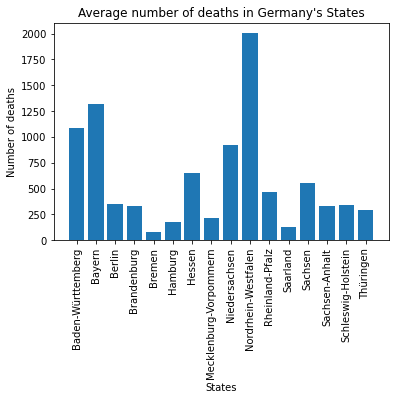

In [10]:
State1 =  avg_deaths_state.State
deaths1 = avg_deaths_state.deaths
plt.bar(State1,deaths1)
plt.xticks(rotation = 90)
plt.title("Average number of deaths in Germany's States")
plt.xlabel('States')
plt.ylabel("Number of deaths")

In [11]:
#1 Most populous state in germany North Rhine-WestPhalie
most_pop_1_df = states_df.loc[states_df['States']== 'Nordrhein-Westfalen']
display(most_pop_1_df)



,Year,States,Age-Group,Januar,February,March,April,May,June,July,August,September,October,November,December,age_to
16,2022,Nordrhein-Westfalen,0-65,1723,1609,1728,1661,1599,1557,0.0,0.0,0.0,0.0,0.0,0.0,65
17,2022,Nordrhein-Westfalen,65-75,1828,1701,1960,1802,1715,1700,0.0,0.0,0.0,0.0,0.0,0.0,75
18,2022,Nordrhein-Westfalen,75-85,3126,2879,3206,3003,2777,2753,0.0,0.0,0.0,0.0,0.0,0.0,85
19,2022,Nordrhein-Westfalen,85+,2906,2982,3189,2854,2644,2473,0.0,0.0,0.0,0.0,0.0,0.0,100
80,2021,Nordrhein-Westfalen,0-65,1853,1546,1651,1776,1767,1712,1641.0,1606.0,1612.0,1654.0,1680.0,1886.0,65
81,2021,Nordrhein-Westfalen,65-75,1981,1746,1785,1788,1874,1631,1720.0,1606.0,1628.0,1770.0,1824.0,2051.0,75
82,2021,Nordrhein-Westfalen,75-85,3590,3008,2987,2963,2910,2746,2660.0,2587.0,2702.0,2930.0,3139.0,3448.0,85
83,2021,Nordrhein-Westfalen,85+,3314,2577,2486,2415,2462,2341,2281.0,2424.0,2561.0,2780.0,2888.0,3262.0,100
144,2020,Nordrhein-Westfalen,0-65,1700,1557,1663,1617,1643,1519,1557.0,1588.0,1553.0,1624.0,1642.0,1764.0,65
145,2020,Nordrhein-Westfalen,65-75,1714,1662,1767,1660,1544,1466,1509.0,1602.0,1503.0,1636.0,1721.0,1973.0,75


In [12]:
pop1 = most_pop_1_df.drop(columns='States',axis=1,inplace=True)
pop1 = most_pop_1_df.melt(id_vars=['Year', 'Age-Group', 'age_to'] )
pop1

d:\PROGRAMMING\anaconda\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Year,Age-Group,age_to,variable,value
0,2022,0-65,65,Januar,1723.0
1,2022,65-75,75,Januar,1828.0
2,2022,75-85,85,Januar,3126.0
3,2022,85+,100,Januar,2906.0
4,2021,0-65,65,Januar,1853.0
...,...,...,...,...,...
331,2017,85+,100,December,2410.0
332,2016,0-65,65,December,1637.0
333,2016,65-75,75,December,1592.0
334,2016,75-85,85,December,3156.0


In [13]:
pop1.columns = ['year', 'age', 'age_to', 'month', 'deaths']
pop1

,year,age,age_to,month,deaths
0,2022,0-65,65,Januar,1723.0
1,2022,65-75,75,Januar,1828.0
2,2022,75-85,85,Januar,3126.0
3,2022,85+,100,Januar,2906.0
4,2021,0-65,65,Januar,1853.0
...,...,...,...,...,...
331,2017,85+,100,December,2410.0
332,2016,0-65,65,December,1637.0
333,2016,65-75,75,December,1592.0
334,2016,75-85,85,December,3156.0


In [14]:
#average death per year
avg1 = pop1.groupby('year').mean()
avg1 = avg1.reset_index()
avg1

,year,age_to,deaths
0,2016,81.25,2057.041667
1,2017,81.25,2080.875000
2,2018,81.25,2139.520833
3,2019,81.25,2117.395833
4,2020,81.25,2207.500000
5,2021,81.25,2276.020833
6,2022,81.25,1153.645833


Text(0, 0.5, 'Number of deaths')

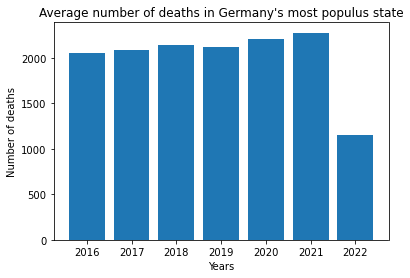

In [15]:
year1 = avg1.year
deaths1 = avg1.deaths
plt.bar(year1,deaths1)
plt.title("Average number of deaths in Germany's most populus state")
plt.xlabel('Years')
plt.ylabel("Number of deaths")

In [16]:
#From the graph above we see 2021 has the mos total number of deaths
#We've decided the year by the age brackets
year_1_21 = pop1.loc[pop1['year'] == 2021]
year_1_21


,year,age,age_to,month,deaths
4,2021,0-65,65,Januar,1853.0
5,2021,65-75,75,Januar,1981.0
6,2021,75-85,85,Januar,3590.0
7,2021,85+,100,Januar,3314.0
32,2021,0-65,65,February,1546.0
33,2021,65-75,75,February,1746.0
34,2021,75-85,85,February,3008.0
35,2021,85+,100,February,2577.0
60,2021,0-65,65,March,1651.0
61,2021,65-75,75,March,1785.0


Text(0.5, 1.0, "Year 2021 where German's most populous state had the highest number of deaths")

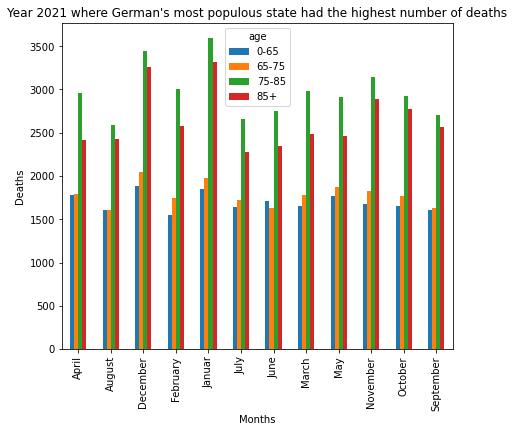

In [17]:
year_1_21_pivot = pd.pivot_table(year_1_21,
                                values = 'deaths',
                                index='month',
                                columns = 'age',
)

ax = year_1_21_pivot.plot(kind='bar')

fig = ax.get_figure()

fig.set_size_inches(7,6)

ax.set_xlabel("Months")
ax.set_ylabel("Deaths")
ax.set_title("Year 2021 where German's most populous state had the highest number of deaths")

In [18]:
#year with the maximum deaths 
pop1.groupby('year').max()
#we see that we have more deaths in the most populous state in germany every year around september from the age bracket of 85 - 100
#we can infer that North_Rhine Westphalia doesn't lose economic manpower because of the age bracket of this ages

,age,age_to,month,deaths
year,,,,
2016,85+,100,September,3286.0
2017,85+,100,September,3625.0
2018,85+,100,September,4010.0
2019,85+,100,September,3365.0
2020,85+,100,September,3760.0
2021,85+,100,September,3590.0
2022,85+,100,September,3206.0


In [19]:
#year with the least number of deaths
pop1.groupby('year').min()
#We can infer that the least number of deaths  in the most populous state in Germany around April,from the age bracket of 0-65
#This further tells us that this state doesn't lose its economic manpower to death
#2022 this state had zero deaths in the month of April

,age,age_to,month,deaths
year,,,,
2016,0-65,65,April,1454.0
2017,0-65,65,April,1387.0
2018,0-65,65,April,1422.0
2019,0-65,65,April,1352.0
2020,0-65,65,April,1466.0
2021,0-65,65,April,1546.0
2022,0-65,65,April,0.0


In [20]:
#1 Least populous state in germany North Rhine-WestPhalie
least_pop_4_df = states_df.loc[states_df['States']== 'Bremen']

In [21]:
pop2 = least_pop_4_df.drop(columns='States',axis=1,inplace=True)
pop2 = least_pop_4_df.melt(id_vars=['Year', 'Age-Group', 'age_to'] )
pop2

d:\PROGRAMMING\anaconda\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Year,Age-Group,age_to,variable,value
0,2022,0-65,65,Januar,85.0
1,2022,65-75,75,Januar,72.0
2,2022,75-85,85,Januar,127.0
3,2022,85+,100,Januar,92.0
4,2021,0-65,65,Januar,76.0
...,...,...,...,...,...
331,2017,85+,100,December,77.0
332,2016,0-65,65,December,80.0
333,2016,65-75,75,December,72.0
334,2016,75-85,85,December,117.0


In [22]:
pop2.columns = ['year', 'age', 'age_to', 'month', 'deaths']
pop2

,year,age,age_to,month,deaths
0,2022,0-65,65,Januar,85.0
1,2022,65-75,75,Januar,72.0
2,2022,75-85,85,Januar,127.0
3,2022,85+,100,Januar,92.0
4,2021,0-65,65,Januar,76.0
...,...,...,...,...,...
331,2017,85+,100,December,77.0
332,2016,0-65,65,December,80.0
333,2016,65-75,75,December,72.0
334,2016,75-85,85,December,117.0


In [23]:
#average death per year
avg2 = pop2.groupby('year').mean()
avg2 = avg2.reset_index()
avg2

,year,age_to,deaths
0,2016,81.25,77.812500
1,2017,81.25,81.479167
2,2018,81.25,83.166667
3,2019,81.25,80.895833
4,2020,81.25,85.145833
5,2021,81.25,87.604167
6,2022,81.25,43.895833


Text(0, 0.5, 'Number of deaths')

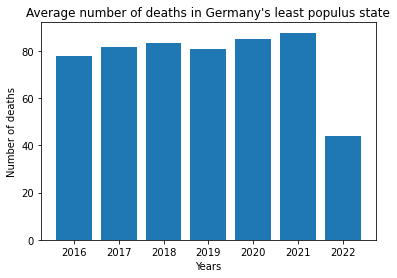

In [24]:
year2 = avg2.year
deaths2 = avg2.deaths
plt.bar(year2,deaths2)
plt.title("Average number of deaths in Germany's least populus state")
plt.xlabel('Years')
plt.ylabel("Number of deaths")

In [25]:
#From the graph above we see 2021 has the mos total number of deaths
#We've decided the year by the age brackets
year_2_21 = pop2.loc[pop1['year'] == 2021]
year_2_21


,year,age,age_to,month,deaths
4,2021,0-65,65,Januar,76.0
5,2021,65-75,75,Januar,66.0
6,2021,75-85,85,Januar,122.0
7,2021,85+,100,Januar,84.0
32,2021,0-65,65,February,65.0
33,2021,65-75,75,February,65.0
34,2021,75-85,85,February,128.0
35,2021,85+,100,February,92.0
60,2021,0-65,65,March,63.0
61,2021,65-75,75,March,72.0


In [26]:
year_2_21_pivot = pd.pivot_table(year_2_21,
                                values = 'deaths',
                                index='month',
                                columns = 'age',
)

year_2_21_pivot



age,0-65,65-75,75-85,85+
month,,,,
April,94.0,80.0,116.0,80.0
August,61.0,65.0,111.0,88.0
December,83.0,99.0,127.0,112.0
February,65.0,65.0,128.0,92.0
Januar,76.0,66.0,122.0,84.0
July,77.0,67.0,107.0,95.0
June,88.0,65.0,122.0,76.0
March,63.0,72.0,123.0,88.0
May,73.0,71.0,109.0,77.0


<AxesSubplot:xlabel='month'>

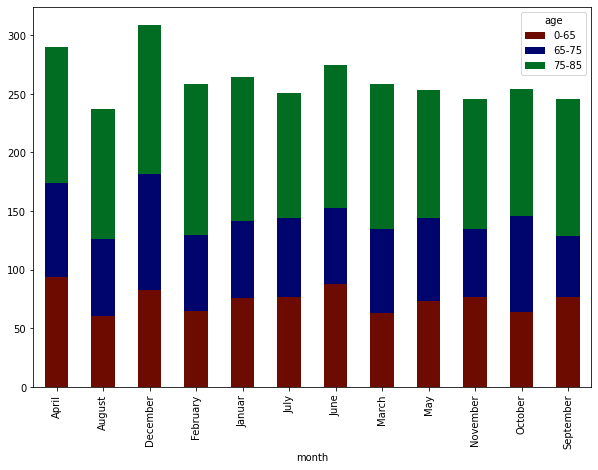

In [27]:
year_2_21_pivot.loc[:,['0-65','65-75', '75-85']].plot.bar(stacked=True, color=colors, figsize=(10,7))

In [28]:
#year with the maximum deaths 
pop2.groupby('year').max()
#we see that we have more deaths in the least populous state Bremen in germany every year around september from the age bracket of 85 - 100
#we can infer that  doesn't lose economic manpower because of the age bracket of this ages

,age,age_to,month,deaths
year,,,,
2016,85+,100,September,130.0
2017,85+,100,September,137.0
2018,85+,100,September,153.0
2019,85+,100,September,126.0
2020,85+,100,September,134.0
2021,85+,100,September,128.0
2022,85+,100,September,129.0


In [29]:
#Least number of deaths
pop2.groupby('year').min()
#We can infer that the least number of deaths  in the most populous state in Germany around April,from the age bracket of 0-65
#This further tells us that this state doesn't lose its economic manpower to death
#2022 this state had zero deaths in the month of April

,age,age_to,month,deaths
year,,,,
2016,0-65,65,April,55.0
2017,0-65,65,April,45.0
2018,0-65,65,April,50.0
2019,0-65,65,April,51.0
2020,0-65,65,April,50.0
2021,0-65,65,April,52.0
2022,0-65,65,April,0.0
